In [73]:
import pandas as pd
import numpy as np


In [74]:
from google.colab import files

upload = files.upload()

Saving Heart Failure data.csv to Heart Failure data (1).csv


In [90]:
dataset = pd.read_csv('Heart Failure data.csv')

In [91]:
X = dataset.drop('target', axis=1, inplace=False)
y = dataset['target']

##1-Task -Comparison of Methods- Feature Selection


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

### 1.1 Feature Selection Mutual Information Gains

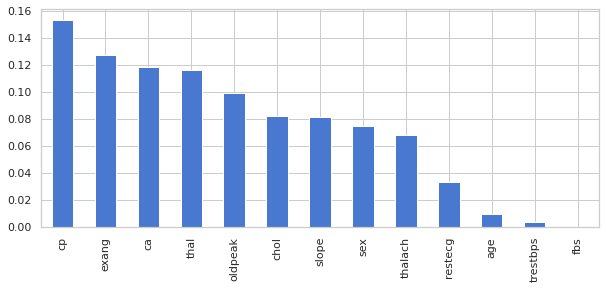

In [93]:
mi = mutual_info_classif(X, y)
mi = pd.Series(mi)
mi.index = X.columns
# mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

# Select Best K columns
# You can specify number of features you want
feature_cols = SelectKBest(mutual_info_classif, k= 5).fit_transform(X, y)

In [94]:
# Applying classification on dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( feature_cols , np.array(y) , test_size = 0.2, random_state=1)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Finding Accuracy
count = 0

for i, data in enumerate(y_pred):
  if y_pred[i] == y_test[i]:
    count += 1

print("Accuracy of predicted rows  ", (count / len(y_pred)) *100)

Accuracy of predicted rows   77.04918032786885


### 1.2 Wrapper Method

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


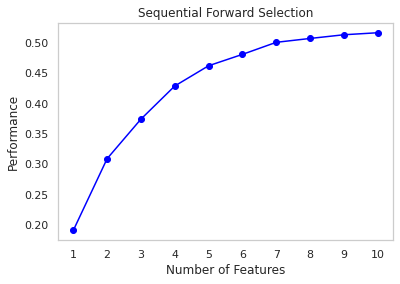

In [95]:
# !pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Define Sequential Forward Selection (sfs)
obj = SFS(LinearRegression(),k_features=10, forward=True, floating=False, scoring = 'r2',cv = 0)

model = obj.fit(X, np.array(y))

fig1 = plot_sfs(model.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [96]:
cols = list(model.k_feature_names_)

cols
X_wrap = X[cols]
y_wrap = np.array(y)

# Applying classification on dataset
X_train, X_test, y_train, y_test = train_test_split(np.array(X_wrap),y_wrap,test_size = 0.2, random_state=2)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Finding Accuracy
count = 0
for i, data in enumerate(y_pred):
  if y_pred[i] == y_test[i]:
    count += 1

print("Accuracy of predicted rows  ", (count / len(y_pred)) *100)


Accuracy of predicted rows   91.80327868852459


In the conclusion of task 1 it can be infered that Filter Method e.g Mutual Information gain is under perform as compared to Wrapper Method.

# 2-Task Classification

Applying Naive Beyes Classification Algorithem on raw data set 

In [97]:
# Applying classification on dataset
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y),test_size = 0.2, random_state=3)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Finding Accuracy
count = 0
for i, data in enumerate(y_pred):
  if y_pred[i] == y_test[i]:
    count += 1
print("Accuracy of predicted rows  ", (count / len(y_pred)) *100)

Accuracy of predicted rows   85.24590163934425


Applying K Mean Clustering Algorithem on raw data set
For finding that, I used Elbow Method 

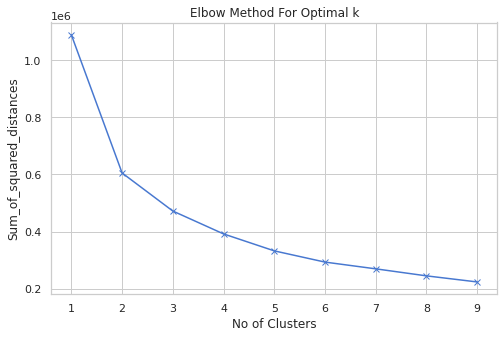

In [98]:
from sklearn.cluster import KMeans
plt.figure(figsize=(8,5))
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It can be seen that 5 clusters is the optimal value for given dataset

In [99]:
model_km_obj = KMeans(n_clusters=5)
model_km = model_km_obj.fit(X)
labels = model_km.labels_
X["labels"] = labels

In [100]:
X = X.values

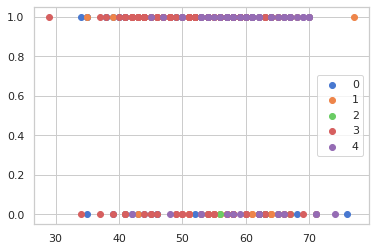

In [101]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In the conclusion of task 2, Classification Algorithm give an accuracy of 85 percent on raw dataset(Unnormalized Dataset). In the Clustering technique I Used elbow method to get optimal k and represent on scatter plot.

# 3-Task- Analysis

#### 1.Discuss the impact of different data imputation methods using classification accuracy.

Ans: Accuracy Can be increased or may decresed by data imputation, its trends is only depends on situation

#### 2.Compare the classification accuracy before and after imputation.

Ans: Given Below, First Method is Do nothing, Second is Drop rows with missing entries and third use deep learning models to fill the missing values. I will show you the second approach. First approach is give the accuracy of 85 percent, you may look at task 2 part 1  

In [104]:
# isna() find missing values
dataset.isna()

# dropna() delete rows with missing values 
dataset.dropna()
X = dataset.drop('target', axis=1, inplace=False)
y = dataset['target']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y),test_size = 0.2, random_state=3)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Finding Accuracy
count = 0
for i, data in enumerate(y_pred):
  if y_pred[i] == y_test[i]:
    count += 1
print("Accuracy of predicted rows  ", (count / len(y_pred)) *100)

Accuracy of predicted rows   85.24590163934425


I find no missing value in dataset. therefore, no change can be deduced

#### 5.Discuss the impact of data normalization on K-NN algorithm using classification accuracy.
Ans: It is evident that machine learning model sometime learn way better and sometime not on normalized data. And the illustration is given below

In [114]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
obj.fit(X)
normalized_data = obj.transform(X)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(normalized_data, np.array(y),test_size = 0.2, random_state=5)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Finding Accuracy
count = 0
for i, data in enumerate(y_pred):
  if y_pred[i] == y_test[i]:
    count += 1
print("Accuracy of predicted rows  ", (count / len(y_pred)) *100)

Accuracy of predicted rows   86.88524590163934


It can be seen that accuracy increased by 1 percent after feeding normalized data to the ML Model

#### 6.Compare  results  of  full  feature  set  and  selected  features  on  Naïve  Bayes  and  K-NN algorithms.
Ans: It can be seen in task 1 and 2 that feature selection model outperform the results with accuracy 91.3 percent as compared to full feature which is 85.1 percent

#### 7.Compute confusion matrix for both classifiers and for each dataset.

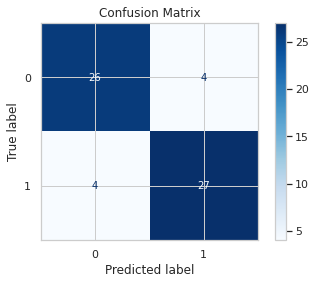

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(gnb,X_test,y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

#### 8.Elaborate results of confusion matrix i.e. predictive accuracy, true positive rate, true negative rate, false positive rate, false negative rate, specificity and sensitivity.